## Dependencias

In [3]:
import pandas as pd
import numpy as np

from datetime import datetime

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

## Lectura de datos

In [4]:
ruta = '/home/oscarjarillo/Documentos/Análisis Multivariado/Perceptron/diabetes.csv'

In [6]:
df = pd.read_csv(ruta)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Análisis exploratorio

### Valores nulos

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

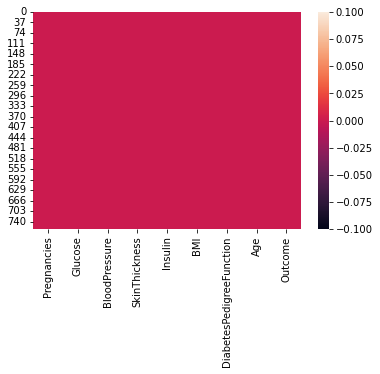

In [13]:
sns.heatmap(df.isnull(), cbar= True)

### Tipo de datos

In [15]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Cambio de nombre de la variable target

In [17]:
df.rename(columns= {'Outcome': 'With_db'}, inplace= True)

## Definición de variables

In [31]:
vt = ['With_db']
var_num = [x for x in df.columns if x != 'With_db']

## Partición

In [40]:
Xt, Xv, yt, yv = train_test_split(df[var_num], df[vt[0]], train_size= 0.7)
Xt.reset_index(drop = True, inplace= True)
Xv.reset_index(drop = True, inplace= True)
yt.reset_index(drop = True, inplace= True)
yv.reset_index(drop = True, inplace= True)

In [41]:
Xt.shape, yv.shape

((537, 8), (231,))

## Aprendizaje

### Hiperparámetros

In [42]:
hp = dict(max_iter = range(100,200),
         fit_intercept = [True, False])

In [43]:
modelo = Perceptron()

### Hiperparametrización

In [44]:
grid = GridSearchCV(param_grid= hp,
                   cv = 3,
                   scoring= 'accuracy',
                   n_jobs = -1,
                   verbose = True,
                   estimator = modelo)

## Entrenamiento

In [45]:
grid.fit(Xt, yt)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=Perceptron(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': range(100, 200)},
             scoring='accuracy', verbose=True)

### Mejores parámetros

In [47]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100}

In [48]:
modelo = grid.best_estimator_
modelo

Perceptron(max_iter=100)

## Validación del modelo

### Probabilidad

In [49]:
print(accuracy_score(y_pred= modelo.predict(Xt), y_true = yt))
print(accuracy_score(y_pred= modelo.predict(Xv), y_true = yv))

0.62756052141527
0.5930735930735931


### Matriz de confusión

In [51]:
print(confusion_matrix(y_pred= modelo.predict(Xt), y_true = yt))
print(confusion_matrix(y_pred= modelo.predict(Xv), y_true = yv))

[[221 136]
 [ 64 116]]
[[81 62]
 [32 56]]


## Predicciones

In [52]:
df['Pred'] = modelo.predict(df[var_num])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,With_db,Pred
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


array([[<AxesSubplot:title={'center':'With_db'}>,
        <AxesSubplot:title={'center':'Pred'}>]], dtype=object)

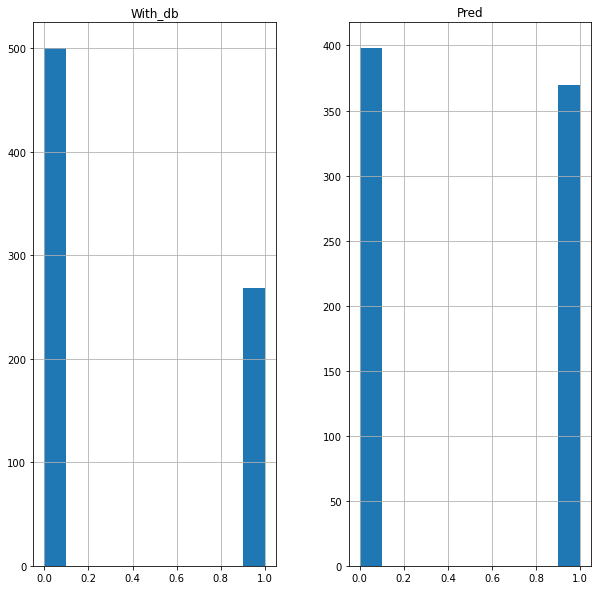

In [55]:
df[['With_db'] + ['Pred']].hist(figsize = (10,10))